# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kudahuvadhoo
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | grabouw
Processing Record 5 of Set 1 | at-bashi
Processing Record 6 of Set 1 | bayanhongor
Processing Record 7 of Set 1 | uturoa
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | dudinka
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | sinabang
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | kharp
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | ross'
City not found. Skipping...
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | yaren
Processing Record 22 of Set 1 | myeik
Processing Record 23 

Processing Record 39 of Set 4 | inari
Processing Record 40 of Set 4 | vakarai
Processing Record 41 of Set 4 | omis
Processing Record 42 of Set 4 | wailua homesteads
Processing Record 43 of Set 4 | east ballina
Processing Record 44 of Set 4 | kormilovka
Processing Record 45 of Set 4 | kenai
Processing Record 46 of Set 4 | kerikeri
Processing Record 47 of Set 4 | balqash
Processing Record 48 of Set 4 | williams lake
Processing Record 49 of Set 4 | ar ruways
Processing Record 0 of Set 5 | belle fourche
Processing Record 1 of Set 5 | moose jaw
Processing Record 2 of Set 5 | barcelos
Processing Record 3 of Set 5 | mitsamiouli
Processing Record 4 of Set 5 | san carlos de bariloche
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | natal
Processing Record 7 of Set 5 | kargasok
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | greymouth
Processing Record 10 of Set 5 | marsh harbour
Processing Record 11 of Set 5 | baise city
Processing Record 12 of Set

Processing Record 31 of Set 8 | broken hill
Processing Record 32 of Set 8 | coruripe
Processing Record 33 of Set 8 | petropavlovsk-kamchatsky
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | emerald
Processing Record 36 of Set 8 | dhrangadhra
Processing Record 37 of Set 8 | maplewood
Processing Record 38 of Set 8 | binhe
Processing Record 39 of Set 8 | berezovyy
Processing Record 40 of Set 8 | shiqian
Processing Record 41 of Set 8 | chaparral
Processing Record 42 of Set 8 | presidente medici
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | benjamin aceval
Processing Record 45 of Set 8 | fort mcmurray
Processing Record 46 of Set 8 | klyuchi
Processing Record 47 of Set 8 | san andres
Processing Record 48 of Set 8 | tsetserleg
Processing Record 49 of Set 8 | chiredzi
Processing Record 0 of Set 9 | i-n-salah
Processing Record 1 of Set 9 | melekeok village
Processing Record 2 of Set 9 | yangor
City not found. Skipping...
Processing Record 3 of 

Processing Record 21 of Set 12 | cidreira
Processing Record 22 of Set 12 | amasra
Processing Record 23 of Set 12 | oum hadjer
Processing Record 24 of Set 12 | roccella ionica
Processing Record 25 of Set 12 | galliano
Processing Record 26 of Set 12 | puerto san jose
Processing Record 27 of Set 12 | silver city
Processing Record 28 of Set 12 | san andros
City not found. Skipping...
Processing Record 29 of Set 12 | san jose village
City not found. Skipping...
Processing Record 30 of Set 12 | crane
Processing Record 31 of Set 12 | quirihue
Processing Record 32 of Set 12 | tefe
Processing Record 33 of Set 12 | krasnovishersk
Processing Record 34 of Set 12 | bengkulu
Processing Record 35 of Set 12 | lock haven
Processing Record 36 of Set 12 | yeniseysk
Processing Record 37 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 38 of Set 12 | chibougamau
Processing Record 39 of Set 12 | novomikhaylovskiy
Processing Record 40 of Set 12 | warrnambool
Processing Record 41 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [25]:
#Capitilizing city names 
city_data_df["City"]=city_data_df["City"].str.title()

# Display sample data
city_data_df.head(20)

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kudahuvadhoo,2.6708,72.8944,81.75,75,12,9.78,MV,1697587582
1,Port-Aux-Francais,-49.3500,70.2167,36.10,73,96,13.91,TF,1697587582
2,Jamestown,42.0970,-79.2353,48.02,87,100,5.75,US,1697587245
3,Grabouw,-34.1515,19.0151,59.40,90,10,5.41,ZA,1697587583
4,At-Bashi,41.1702,75.8106,40.71,64,70,5.97,KG,1697587583
5,Bayanhongor,46.7167,100.1167,26.80,34,81,2.06,MN,1697587583
6,Uturoa,-16.7333,-151.4333,79.02,82,79,15.35,PF,1697587584
7,Blackmans Bay,-43.0167,147.3167,64.53,49,40,1.01,AU,1697587401
8,Dudinka,69.4058,86.1778,31.68,98,100,5.99,RU,1697587584


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df = city_data_df.rename(columns={"Lat":"Latitude", "Lng":"Longitude", "Max Temp":"Max Temp (F)"})

# Display sample data
city_data_df.head()


,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kudahuvadhoo,2.6708,72.8944,81.75,75,12,9.78,MV,1697587582
1,Port-Aux-Francais,-49.3500,70.2167,36.10,73,96,13.91,TF,1697587582
2,Jamestown,42.0970,-79.2353,48.02,87,100,5.75,US,1697587245
3,Grabouw,-34.1515,19.0151,59.40,90,10,5.41,ZA,1697587583
4,At-Bashi,41.1702,75.8106,40.71,64,70,5.97,KG,1697587583


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

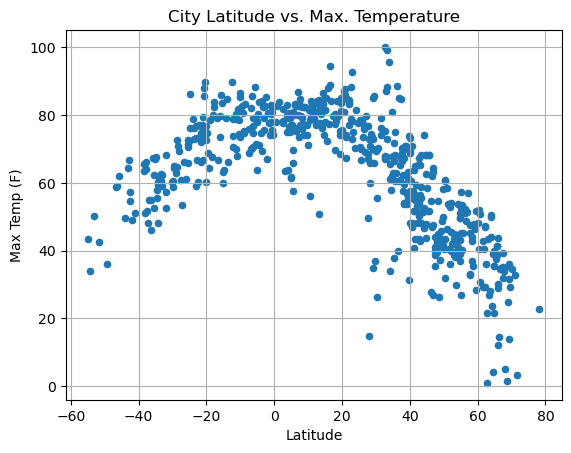

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Latitude", y="Max Temp (F)", grid=True, title="City Latitude vs. Max. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

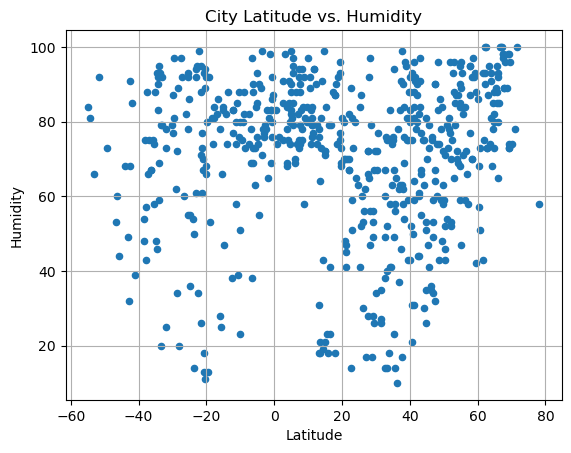

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, title="City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

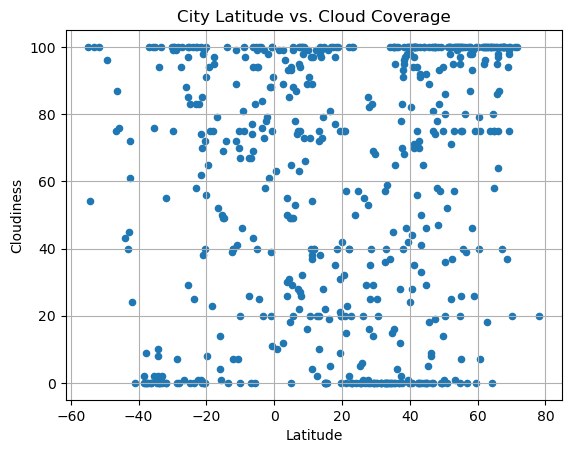

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, title="City Latitude vs. Cloud Coverage")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

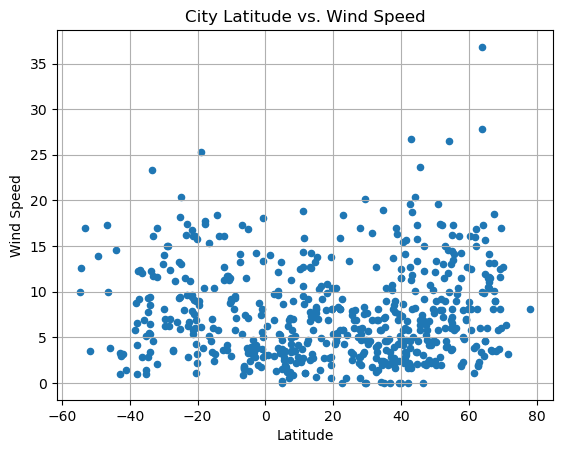

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, title="City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
x_val = city_data_df["Latitude"]
y_val = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Kudahuvadhoo,2.6708,72.8944,81.75,75,12,9.78,MV,1697587582
2,Jamestown,42.0970,-79.2353,48.02,87,100,5.75,US,1697587245
4,At-Bashi,41.1702,75.8106,40.71,64,70,5.97,KG,1697587583
5,Bayanhongor,46.7167,100.1167,26.80,34,81,2.06,MN,1697587583
8,Dudinka,69.4058,86.1778,31.68,98,100,5.99,RU,1697587584


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Port-Aux-Francais,-49.3500,70.2167,36.10,73,96,13.91,TF,1697587582
3,Grabouw,-34.1515,19.0151,59.40,90,10,5.41,ZA,1697587583
6,Uturoa,-16.7333,-151.4333,79.02,82,79,15.35,PF,1697587584
7,Blackmans Bay,-43.0167,147.3167,64.53,49,40,1.01,AU,1697587401
15,Vanimo,-2.6741,141.3028,82.76,79,58,4.16,PG,1697587587


###  Temperature vs. Latitude Linear Regression Plot

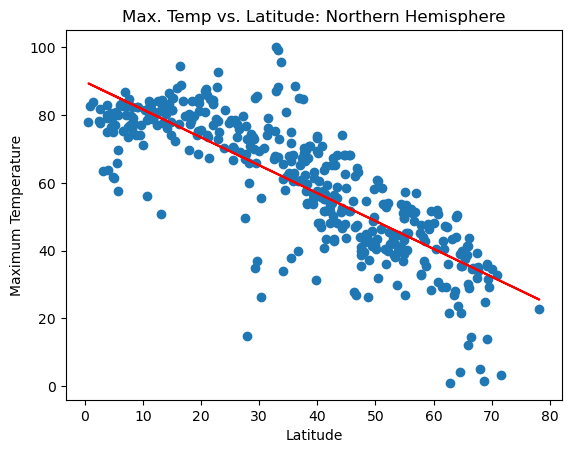

In [18]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Max. Temp vs. Latitude: Northern Hemisphere")
plt.show()

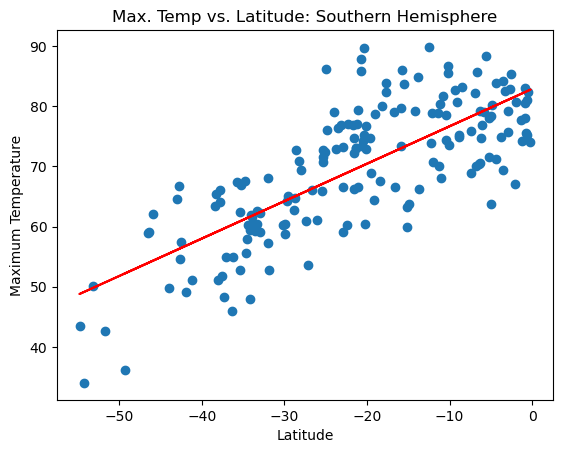

In [19]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (-30,280))
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Max. Temp vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** In the two above scatterplot graphs showing Latitude vs. maximum temperature, we can see that there is a clear linear relationship in both the Northern Hemisphere and the Southern Hemisphere.  In the north, maximum temperature is directly, negatively correlated to latitude.  That is, the higher the latitude (the further north), the lower the maximum temperature will be.  We see this exact correlation mirrored in the Southern Hemisphere, where maximum temperature is positively correlated to latitude: the further south you go (lower latitudes), the lower the maximum temperature will be.  Of all the linear relationships depicted, this one has the strongest correlation.  

### Humidity vs. Latitude Linear Regression Plot

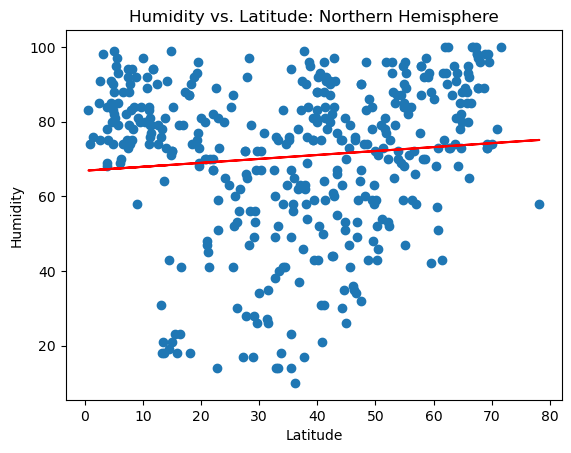

In [20]:
# Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude: Northern Hemisphere")
plt.show()

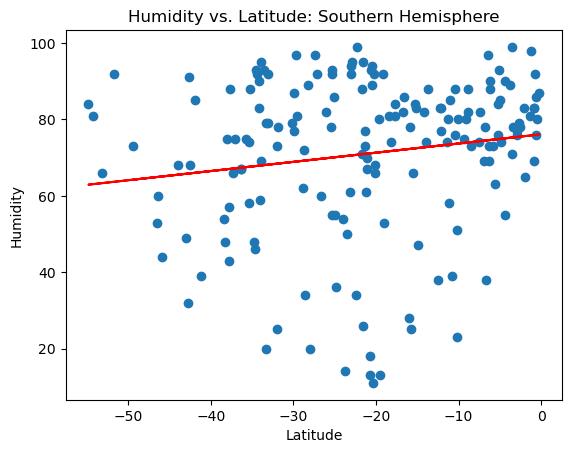

In [21]:
# Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between humidity and latitude in either the Southern or the Northern Hemisphere.  We do see an overall higher rate of humidity in the Northern Hemispehre than the Southern Hemisphere, but from the above graphs we can see that humidity can occur in any latitude, and does not directly, strongly correlate to the latitude of that location.  

### Cloudiness vs. Latitude Linear Regression Plot

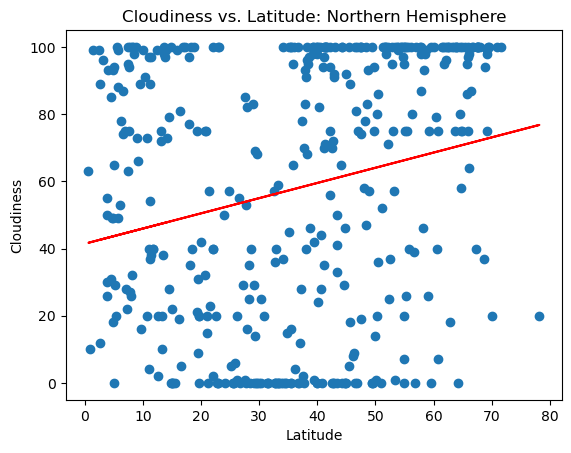

In [22]:
# Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude: Northern Hemisphere")
plt.show()

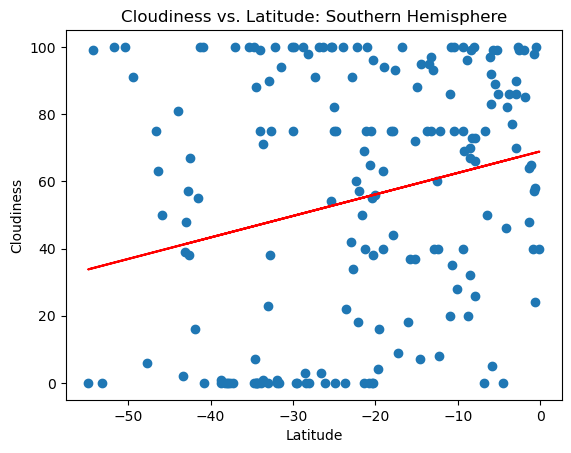

In [20]:
# Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** No linear relationship can be seen between latitude and cloudiness.  Of the three relationships graphed so far, this one has the smallest correlation.  What we can see on the scatterplot graphs is the strong tendency of locations to have either 0 or 100 cloudiness.  In both the Northern and the Southern Hemisphere, while there are many dots mid graph, there is a strong tendency towards the two extremes of the cloudiness spectrum.  This tendency is slightly stronger in the North than in the South.  

### Wind Speed vs. Latitude Linear Regression Plot

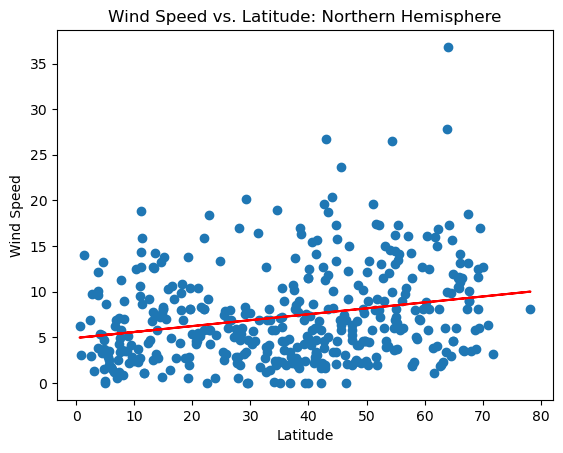

In [24]:
# Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude: Northern Hemisphere")
plt.show()

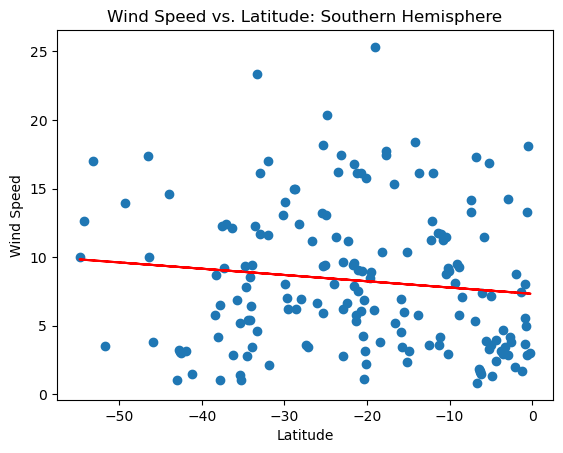

In [23]:
# Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** For wind speed versus latitude, there is a small positive correlation between latitude and windspeed in the Northern Hemisphere.  As altitude increases, so does wind speed. We also see more discrepancy between wind speeds at the higher latitudes.  That means that the further north we go, the windier it may be.  We see the opposite mirror correlation in the Southern Hemisphere.  The larger the latitude gets, which means the closer towards the equator, the lower the wind speed gets.  On both sides of the planet, we see wind speeds increasing towards the poles and decreasing towards the equator.  